#Build a decision tree to predict the income of a given population, which is labelled as <= 50K and > 50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.

In [ ]:
#decision tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isin(['?']).sum(axis=0)

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df=df.replace('?',np.nan)
df=df.dropna()

In [ ]:
df.isin(['?']).sum(axis=0)

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,2,6096,11,8,6,3,1,4,0,0,89,17,38,0
3,37,2,6564,5,3,0,6,4,4,0,0,88,39,38,0
4,24,2,15770,15,9,5,9,3,4,0,0,88,39,38,0
5,17,2,13278,11,8,0,7,4,4,0,0,87,44,38,0
6,21,2,7296,0,5,5,0,4,4,1,0,87,39,38,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop('income',axis=1)
y=df['income']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8339134758826454


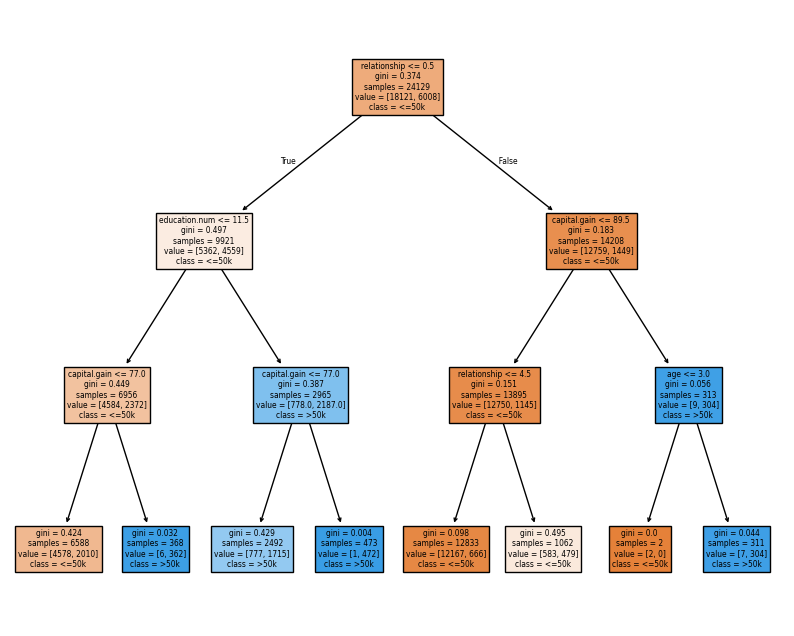

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(decision_tree=clf,feature_names=x.columns,class_names=['<=50k','>50k'],filled=True)
plt.show()

In [ ]:

import ipywidgets as widgets
from IPython.display import display

header=widgets.HTML("<h3>Income Prediction</h3>")
footer=widgets.HTML("<p>© 211P011 - Decision Tree</p>")
max_depth_slider = widgets.IntSlider(value=3, min=1, max=10, description='Max Depth:')
test_size_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.1, description='Test Size:')

train_button = widgets.Button(description='Train Model')

accuracy_output = widgets.Output()
tree_plot_output = widgets.Output()

def on_train_button_clicked(b):
  with accuracy_output:
    accuracy_output.clear_output()
    max_depth = max_depth_slider.value
    test_size = test_size_slider.value

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

  with tree_plot_output:
    tree_plot_output.clear_output()
    plt.figure(figsize=(8, 6))
    plot_tree(decision_tree=clf, feature_names=x.columns, class_names=['<=50k', '>50k'], filled=True)
    plt.show()

train_button.on_click(on_train_button_clicked)

top_row = widgets.HBox([widgets.VBox([
    max_depth_slider,
    test_size_slider,
    train_button,
    accuracy_output
    ]),tree_plot_output],
                       layout=widgets.Layout(align_items='center', justify_content='center'))
main_layout = widgets.VBox([header, top_row, footer],
                            layout=widgets.Layout(align_items='center', justify_content='center'))

display(main_layout)


#Implement decision tree on any case study.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import ipywidgets as widgets
from IPython.display import display

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Function to predict the iris species based on user input
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)
    species = iris.target_names[prediction][0]
    return species

# Create input widgets
sepal_length = widgets.FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Sepal Length:')
sepal_width = widgets.FloatSlider(value=3.0, min=2.0, max=5.0, step=0.1, description='Sepal Width:')
petal_length = widgets.FloatSlider(value=1.5, min=0.1, max=7.0, step=0.1, description='Petal Length:')
petal_width = widgets.FloatSlider(value=0.2, min=0.0, max=2.5, step=0.1, description='Petal Width:')

# Create a button to make the prediction
button = widgets.Button(description="Predict Species")

# Output widget to display the result
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        species = predict_species(sepal_length.value, sepal_width.value, petal_length.value, petal_width.value)
        print(f'The predicted species is: {species}')

button.on_click(on_button_click)

# Display the widgets
display(sepal_length, sepal_width, petal_length, petal_width, button, output)


FloatSlider(value=5.0, description='Sepal Length:', max=8.0, min=4.0)

FloatSlider(value=3.0, description='Sepal Width:', max=5.0, min=2.0)

FloatSlider(value=1.5, description='Petal Length:', max=7.0, min=0.1)

FloatSlider(value=0.2, description='Petal Width:', max=2.5)

Button(description='Predict Species', style=ButtonStyle())

Output()